<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des Régions de Confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy d’un sous-problème de
régions de confiance (fichier `Pas_De_Cauchy.jl`). La spécification de cet algorithme est donnée ci-dessous.

In [1]:
using LinearAlgebra
using Documenter
using Markdown  
include("Pas_De_Cauchy.jl")
# @doc Pas_De_Cauchy

Pas_De_Cauchy

2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du Pas de Cauchy. Vous créerez pour cela un fichier `tester_pas_de_Cauchy.jl` dans le répertoire `test` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [2]:
using Test

include("../test/tester_pas_de_Cauchy.jl")
include("../src/Pas_De_Cauchy.jl")

@testset "Test algo pas de Cauchy" begin
	tester_pas_de_Cauchy(Pas_De_Cauchy)
end;

Test Summary:           | Pass  Total  Time
Test algo pas de Cauchy |   10     10  2.9s


3. Coder l'algorithme des Régions de Confiance (fichier `Regions_De_Confiance.jl`). Sa spécification est donnée ci-dessous.

In [3]:
include("Regions_De_Confiance.jl")
# @doc Regions_De_Confiance

Regions_De_Confiance

4. Vérifier que les tests ci-dessous passent.

In [4]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_regions_de_confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")

affiche = true

@testset "Test rc avec cauchy" begin
	tester_regions_de_confiance(affiche,Regions_De_Confiance)
end;

-------------------------------------------------------------------------
Résultats de : régions de confiance avec cauchy appliqué à fonction 1 au point initial x011 :


  * xsol = [1.0000558873349883, 0.999992420017735, 0.9999289527004819]


  * f(xsol) = 18.0
  * nb_iters = 26
  * flag = 

2
  * sol_exacte : 

[1, 1, 1]


-------------------------------------------------------------------------
Résultats de : régions de confiance avec cauchy appliqué à fonction 1 au point initial x012 :
  * xsol = [1.000049795462743, 0.9999961002424803, 0.9999424049876057]
  * f(xsol) = 18.0
  * nb_iters = 28
  * flag = 2
  * sol_exacte : [1, 1, 1]

-------------------------------------------------------------------------
Résultats de : régions de confiance avec cauchy appliqué à fonction 2 au point initial x021 :
  * xsol = [0.9975992881487654

, 0.9951970760634036]
  * f(xsol) = 1.0
  * nb_iters = 3988
  * flag = 2
  * sol_exacte : [1, 1]


iters = 864
-------------------------------------------------------------------------
Résultats de : régions de confiance avec cauchy appliqué à fonction 2 au point initial x022 :
  * xsol = [0.9961677295964368, 0.9923393628804894]
  * f(xsol) = 1.0
  * nb_iters = 864
  * flag = 0
  * sol_exacte : [1, 1]


-------------------------------------------------------------------------
Résultats de : régions de confiance avec cauchy appliqué à fonction 2 au point initial x023 :
  * xsol = [0.998024983312937, 0.9960352320641266]
  * f(xsol) = 1.0
  * nb_iters = 3198
  * flag = 2
  * sol_exacte : [1, 1]
-------------------------------------------------------------------------
Résultats de : régions de confiance avec gct appliqué à fonction 1 au point initial x011 :
  * xsol = [1.0000000000000007, 1.0, 1.0]
  * f(xsol) = 18.0
  * nb_iters = 1
  * flag = 0
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : régions de confiance avec gct appliqué à fonction 1 au point initial x012 :
  * xsol = [1.0, 1.0, 1.0]


  * f(xsol) = 18.0
  * nb_iters = 3
  * flag = 0
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : régions de confiance avec gct appliqué à fonction 2 au point initial x021 :
  * xsol = [0.9999996743780089, 0.9999993478371609]
  * f(xsol) = 1.0
  * nb_iters = 31
  * flag = 0
  * sol_exacte : [1, 1]
-------------------------------------------------------------------------
Résultats de : régions de confiance avec gct appliqué à fonction 2 au point initial x022 :
  * xsol = [1.0000035183009863, 1.0000066949336202]
  * f(xsol) = 1.0
  * nb_iters = 44
  * flag = 0
  * sol_exacte : [1, 1]
-------------------------------------------------------------------------
Résultats de : régions de confiance avec gct appliqué à fonction 2 au point initial x023 :
  * xsol = [1.0000000000000007, 1.0, 1.0]
  * f(xsol) = 1.0
  * nb_iters = 19
  * flag = 0
  * sol_exacte : [1, 1]
Test Summary:       | Pass  Total   Time
Test rc avec cauchy |  

## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit $$ f_{1} : \mathbf{R}^3 \rightarrow \mathbf{R}$$ $$ (x_1,x_2, x_3) \mapsto  2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2$$ Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de Newton et RC-Pas de Cauchy sur cette fonction.

2.  Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

## Réponse Q1

Soit $$ f_{1} : \mathbf{R}^3 \rightarrow \mathbf{R}$$ $$ (x_1,x_2, x_3) \mapsto  2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2$$ Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de Newton et RC-Pas de Cauchy sur cette fonction.

$f_{1}$ est égal à son développement de Taylor à l'ordre 2, l'algorithme de Newton converge donc en une seule itération. L'algorithme de RC-Pas de Cauchy lui converge en 28 itérations (pour le point x012), de plus, la tolérance d'erreur est plus grande pour RC-Pas de Cauchy que pour Newton. Au final et seulement pour cette fonction en particulier, Newton est plus efficace car plus rapide et plus précis. 

Cepandant et on l'a vu précédemment, Newton peut ne jamais converger, ce qui n'est pas le cas pour RC-Pas de Cauchy qui reste toujours dans une région proche de la solution du problème.

## Réponse Q2
Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.


On peut jouer sur les deux bornes de l'intervalle $[\eta_{1}, \eta_{2}]$ qui sont les critères d'agrandissement et de réduction de la région de confiance.

On peut également jouer sur les valeurs de $\gamma_{1}$ et $\gamma_{2}$ qui sont les facteurs d'agrandissement et de réduction de la région de confiance.

Il y a également le paramètre $\Delta_{max}$ qui est le rayon maximal de la région de confiance. 


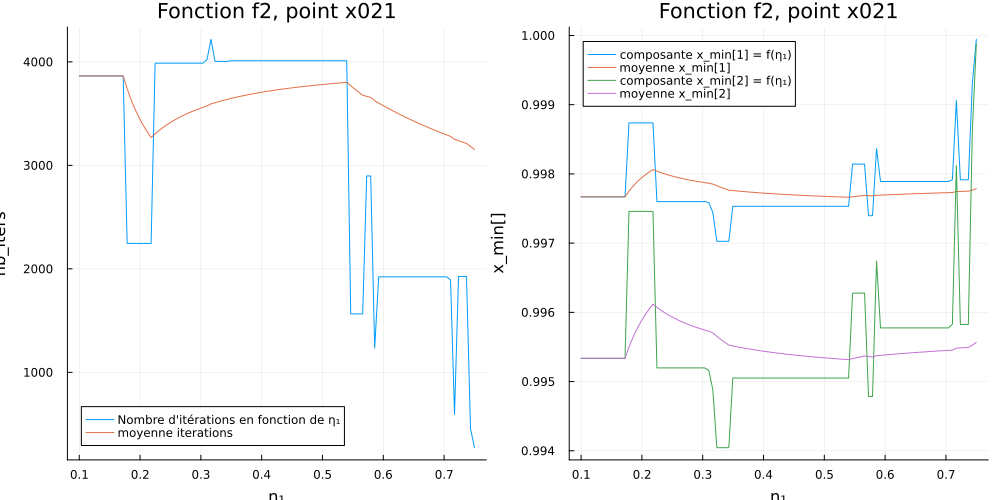

In [5]:
using Plots
include("../src/Regions_De_Confiance.jl")
include("../src/Pas_De_Cauchy.jl")

# La tolérance utilisée dans les tests
tol_erreur = 1e-2
# initialisation des variables de l'algorithme
gamma1 = 0.5
gamma2 = 2.00
#eta1 = 0.25
eta2 = 0.75
deltaMax = 10
Tol_abs = sqrt(eps())
Tol_rel = 1e-8
epsilon = 1
maxits = 5000
delta0_1 = 2
delta0_2 = 2
iters = []
etas1 = []
x_mins1 = []
x_mins2 = []

for eta1 in range(0.1,eta2,length=100)
    options =[deltaMax,gamma1,gamma2,eta1,eta2,delta0_1,maxits,Tol_abs,Tol_rel,epsilon]
    x_min, _, _, nb_iters  = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x021,options)
    iters = [iters ; nb_iters]
    etas1 = [etas1 ; eta1]
    x_mins1 = [x_mins1 ; x_min[1]]
    x_mins2 = [x_mins2 ; x_min[2]]
end

moy_iter = zeros(length(iters))
for i in 1:length(iters)
    moy_iter[i] = sum(iters[1:i])/length(iters[1:i])
end

moy_x_min1 = zeros(length(x_mins1))
moy_x_min2 = zeros(length(x_mins2))
for i in 1:length(x_mins1)
    moy_x_min1[i] = sum(x_mins1[1:i])/length(x_mins1[1:i])
    moy_x_min2[i] = sum(x_mins2[1:i])/length(x_mins2[1:i])
end

p1 = plot(etas1,[iters, moy_iter], label=["Nombre d'itérations en fonction de η₁" "moyenne iterations"], xlabel="η₁", ylabel="nb_iters", title="Fonction f2, point x021", legend=:bottomleft)
p2 = plot(etas1,[x_mins1,moy_x_min1, x_mins2, moy_x_min2], label=["composante x_min[1] = f(η₁)" "moyenne x_min[1]" "composante x_min[2] = f(η₁)" "moyenne x_min[2]"], xlabel="η₁", ylabel="x_min[]", title="Fonction f2, point x021", legend=:topleft)
plot(p1,p2,layout=(1,2),size=(1000,500))


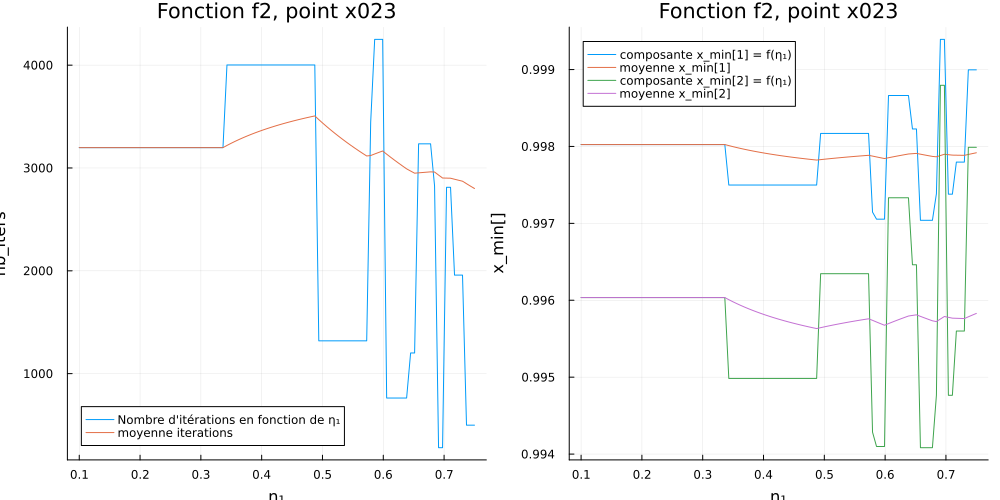

In [6]:
using Plots
include("../src/Regions_De_Confiance.jl")
include("../src/Pas_De_Cauchy.jl")

# La tolérance utilisée dans les tests
tol_erreur = 1e-2
# initialisation des variables de l'algorithme
gamma1 = 0.5
gamma2 = 2.00
#eta1 = 0.25
eta2 = 0.75
deltaMax = 10
Tol_abs = sqrt(eps())
Tol_rel = 1e-8
epsilon = 1
maxits = 5000
delta0_1 = 2
delta0_2 = 2
iters = []
etas1 = []
x_mins1 = []
x_mins2 = []

for eta1 in range(0.1,eta2,length=100)
    options =[deltaMax,gamma1,gamma2,eta1,eta2,delta0_1,maxits,Tol_abs,Tol_rel,epsilon]
    x_min, _, _, nb_iters  = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x023,options)
    iters = [iters ; nb_iters]
    etas1 = [etas1 ; eta1]
    x_mins1 = [x_mins1 ; x_min[1]]
    x_mins2 = [x_mins2 ; x_min[2]]
end

moy_iter = zeros(length(iters))
for i in 1:length(iters)
    moy_iter[i] = sum(iters[1:i])/length(iters[1:i])
end

moy_x_min1 = zeros(length(x_mins1))
moy_x_min2 = zeros(length(x_mins2))
for i in 1:length(x_mins1)
    moy_x_min1[i] = sum(x_mins1[1:i])/length(x_mins1[1:i])
    moy_x_min2[i] = sum(x_mins2[1:i])/length(x_mins2[1:i])
end

p1 = plot(etas1,[iters, moy_iter], label=["Nombre d'itérations en fonction de η₁" "moyenne iterations"], xlabel="η₁", ylabel="nb_iters", title="Fonction f2, point x023", legend=:bottomleft)
p2 = plot(etas1,[x_mins1,moy_x_min1, x_mins2, moy_x_min2], label=["composante x_min[1] = f(η₁)" "moyenne x_min[1]" "composante x_min[2] = f(η₁)" "moyenne x_min[2]"], xlabel="η₁", ylabel="x_min[]", title="Fonction f2, point x023", legend=:topleft)
plot(p1,p2,layout=(1,2),size=(1000,500))


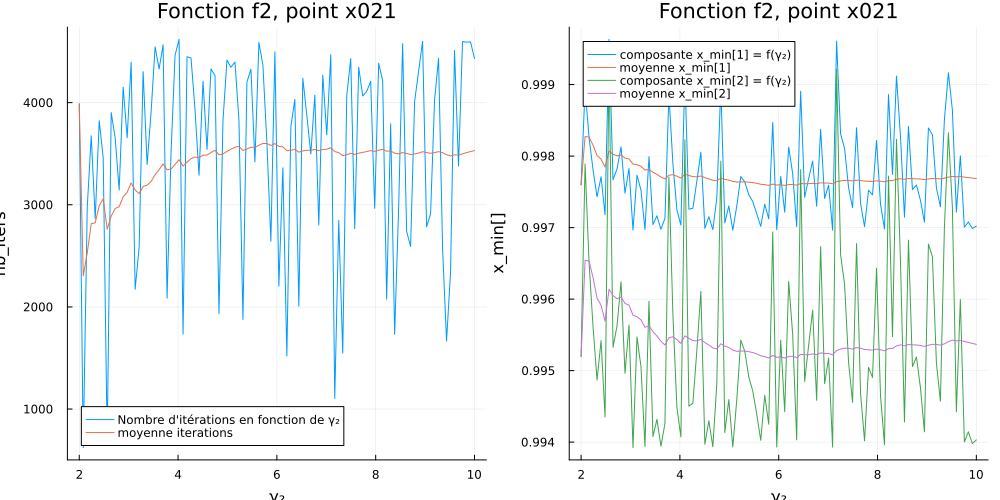

In [7]:
using Plots
include("../src/Regions_De_Confiance.jl")
include("../src/Pas_De_Cauchy.jl")

# La tolérance utilisée dans les tests
tol_erreur = 1e-2
# initialisation des variables de l'algorithme
gamma1 = 0.5
#gamma2 = 2.00
eta1 = 0.25
eta2 = 0.75
deltaMax = 10
Tol_abs = sqrt(eps())
Tol_rel = 1e-8
epsilon = 1
maxits = 5000
delta0_1 = 2
delta0_2 = 2
iters = []
gammas2 = []
x_mins1 = []
x_mins2 = []

for gamma2 in range(2,10,length=100)
    options =[deltaMax,gamma1,gamma2,eta1,eta2,delta0_1,maxits,Tol_abs,Tol_rel,epsilon]
    x_min, _, _, nb_iters  = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x021,options)
    iters = [iters ; nb_iters]
    gammas2 = [gammas2 ; gamma2]
    x_mins1 = [x_mins1 ; x_min[1]]
    x_mins2 = [x_mins2 ; x_min[2]]
end

moy_iter = zeros(length(iters))
for i in 1:length(iters)
    moy_iter[i] = sum(iters[1:i])/length(iters[1:i])
end

moy_x_min1 = zeros(length(x_mins1))
moy_x_min2 = zeros(length(x_mins2))
for i in 1:length(x_mins1)
    moy_x_min1[i] = sum(x_mins1[1:i])/length(x_mins1[1:i])
    moy_x_min2[i] = sum(x_mins2[1:i])/length(x_mins2[1:i])
end

p1 = plot(gammas2,[iters, moy_iter], label=["Nombre d'itérations en fonction de γ₂" "moyenne iterations"], xlabel="γ₂", ylabel="nb_iters", title="Fonction f2, point x021", legend=:bottomleft)
p2 = plot(gammas2,[x_mins1,moy_x_min1, x_mins2, moy_x_min2], label=["composante x_min[1] = f(γ₂)" "moyenne x_min[1]" "composante x_min[2] = f(γ₂)" "moyenne x_min[2]"], xlabel="γ₂", ylabel="x_min[]", title="Fonction f2, point x021", legend=:topleft)
plot(p1,p2,layout=(1,2),size=(1000,500))


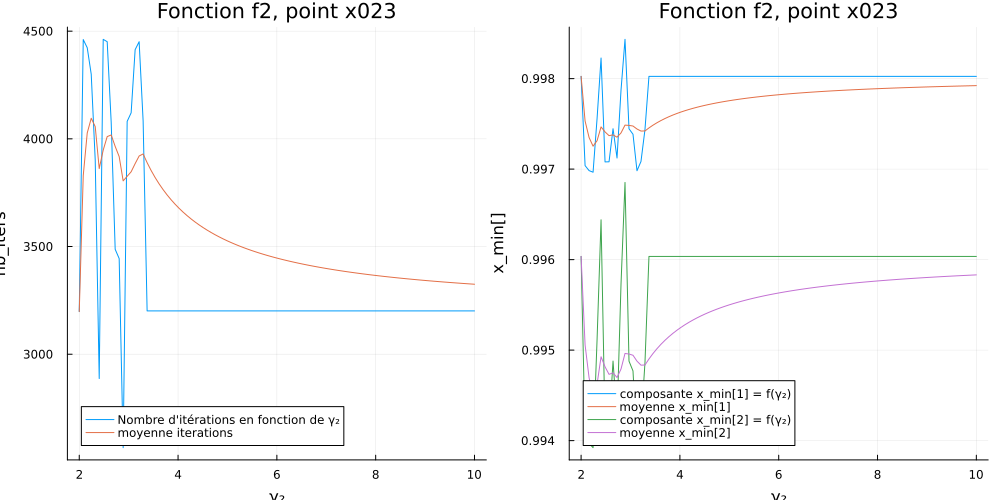

In [8]:
using Plots
include("../src/Regions_De_Confiance.jl")
include("../src/Pas_De_Cauchy.jl")

# La tolérance utilisée dans les tests
tol_erreur = 1e-2
# initialisation des variables de l'algorithme
gamma1 = 0.5
#gamma2 = 2.00
eta1 = 0.25
eta2 = 0.75
deltaMax = 10
Tol_abs = sqrt(eps())
Tol_rel = 1e-8
epsilon = 1
maxits = 5000
delta0_1 = 2
delta0_2 = 2
iters = []
gammas2 = []
x_mins1 = []
x_mins2 = []

for gamma2 in range(2,10,length=100)
    options =[deltaMax,gamma1,gamma2,eta1,eta2,delta0_1,maxits,Tol_abs,Tol_rel,epsilon]
    x_min, _, _, nb_iters  = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x023,options)
    iters = [iters ; nb_iters]
    gammas2 = [gammas2 ; gamma2]
    x_mins1 = [x_mins1 ; x_min[1]]
    x_mins2 = [x_mins2 ; x_min[2]]
end

moy_iter = zeros(length(iters))
for i in 1:length(iters)
    moy_iter[i] = sum(iters[1:i])/length(iters[1:i])
end

moy_x_min1 = zeros(length(x_mins1))
moy_x_min2 = zeros(length(x_mins2))
for i in 1:length(x_mins1)
    moy_x_min1[i] = sum(x_mins1[1:i])/length(x_mins1[1:i])
    moy_x_min2[i] = sum(x_mins2[1:i])/length(x_mins2[1:i])
end

p1 = plot(gammas2,[iters, moy_iter], label=["Nombre d'itérations en fonction de γ₂" "moyenne iterations"], xlabel="γ₂", ylabel="nb_iters", title="Fonction f2, point x023", legend=:bottomleft)
p2 = plot(gammas2,[x_mins1,moy_x_min1, x_mins2, moy_x_min2], label=["composante x_min[1] = f(γ₂)" "moyenne x_min[1]" "composante x_min[2] = f(γ₂)" "moyenne x_min[2]"], xlabel="γ₂", ylabel="x_min[]", title="Fonction f2, point x023", legend=:bottomleft)
plot(p1,p2,layout=(1,2),size=(1000,500))


Il est clair que le comportement de l'algorithme vis-à-vis du changement de ses paramètres diffère énormément selon la fonction testée et le point initial choisi. Il semblerait tout de même qu'augmenter $\eta_{1}$ (et donc réduire l'intervalle) fasse converger l'algorithme plus rapidement. Augmenter $\gamma_{2}$ fait converger plus lentement f2 avec comme point initial x021, à l'inverse la convergence est plus rapide et plus précise poour f2 avec comme point initial x023. Il est difficile de conclure sur l'influence de la précision de manière générale. Au vu des résultats, on peut dire que les meilleurs paramètres sont finalement ceux qui sont les plus adaptés au problème considéré.

# Régions de confiance avec Gradient Conjugué
## Implémentation 

1. Implémenter l’algorithme du Gradient Conjugué Tronqué (fichier `Gradient_Conjugue_Tronque.jl`). Sa spécification est donnée ci-dessous.

In [9]:
include("Gradient_Conjugue_Tronque.jl")
# @doc Gradient_Conjugue_Tronque

Gradient_Conjugue_Tronque

2. Vérifier que les tests ci-dessous passent.

In [10]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_gct.jl")
include("../src/Gradient_Conjugue_Tronque.jl")

affiche = false

@testset "Test gct" begin
	tester_gct(affiche,Gradient_Conjugue_Tronque)
end;

Test Summary: | Pass  Total  Time
Test gct      |    9      9  2.3s


3. Intégrer l’algorithme du Gradient Conjugué Tronqué dans le code de régions de confiance (fichier `Regions_De_Confiance.jl`).

4. Décommenter les tests avec le gradient conjugué dans `tester_regions_de_confiance.jl` et vérifier que les tests passent.

In [11]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_regions_de_confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")

affiche = false

@testset "Test rc avec cauchy et gct" begin
	tester_regions_de_confiance(affiche,Regions_De_Confiance)
end;

iters = 864
Test Summary:              | Pass  Total  Time
Test rc avec cauchy et gct |   30     30  4.8s


## Interprétation  

1. Comparer la décroissance obtenue avec celle du pas de Cauchy, en imposant la sortie
dans l’algorithme au bout d’une itération seulement. Vous donnerez ci-après des résultats numériques. 
    1. Que remarquez vous ?
    2. Comparer la décroissance obtenue avec celle du pas de Cauchy dans le cas général.

3. Quels sont les avantages et inconvénients des deux approches ?

In [12]:
include("Pas_De_Cauchy.jl")
include("Gradient_Conjugue_Tronque.jl")

# La tolérance utilisée dans les tests
tol_erreur = 1e-2
# initialisation des variables de l'algorithme
gamma1 = 0.5
gamma2 = 2.00
eta1 = 0.25
eta2 = 0.75
deltaMax = 10
Tol_abs = sqrt(eps())
Tol_rel = 1e-8
epsilon = 1
maxits = 1
delta0_1 = 2
delta0_2 = 2
options =[deltaMax,gamma1,gamma2,eta1,eta2,delta0_1,maxits,Tol_abs,Tol_rel,epsilon]

# Iter = 1
_, _, _, _  = Regions_De_Confiance("cauchy",fct1,grad_fct1,hess_fct1,pts1.x011,options)
_, _, _, _  = Regions_De_Confiance("gct",fct1,grad_fct1,hess_fct1,pts1.x011,options)
print()
_, _, _, _ = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x023,options)
_, _, _, _ = Regions_De_Confiance("gct",fct2,grad_fct2,hess_fct2,pts1.x023,options)
print()
#=
# Cas général
_, _, _, _  = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x021,[])
_, _, _, _  = Regions_De_Confiance("gct",fct2,grad_fct2,hess_fct2,pts1.x021,[])
print()
=#

## Réponse Q1

1. Comparer la décroissance obtenue avec celle du pas de Cauchy, en imposant la sortie
dans l’algorithme au bout d’une itération seulement.

On pose maxits = 1 pour forcer l'algorithme à s'arrêter après une itération.
On affiche la valeur de la décroissance dans l'algorithme (print ( f(xₖ) - f(xₖ+sₖ) ) ).
Et on teste les deux variantes pour différentes fonctions et différents points initiaux (code ci-dessus).
Voici les résultats :

 | f2   | Cauchy    | Gct       |  
|------|-----------|-----------|
| x021 | 19.63     | 19.63     |
| x022 | 591198.87 | 591198.87 |
| x023 | 0.04937   | 0.04937   |

| f1   | Cauchy | Gct   |
|------|--------|-------|
| x011 | 8.53   | 8.53  |
| x012 | 91.70  | 91.70 |

La décroissance obtenue pour les deux méthodes est la même, ce qui est normal puisque sur la première itération, le gradient conjugué tronqué utilise la même direction que le pas de Cauchy pour la minimisation (direction opposée au gradient), en d'autres termes les deux méthodes sont identiques pour l'itération 1.	


2. Comparer la décroissance obtenue avec celle du pas de Cauchy dans le cas général.

On calcule la décroissance à chaque itération et on la stock dans une liste. On moyenne ensuite les décroissances pour chaque méthode et on affiche le résultat. Voici les décroissances moyennes :

| f2   | Cauchy  | Gct      |
|------|---------|----------|
| x021 | -205.58 | -19.74   |
| x022 | 1000.08 | 22218.87 |
| x023 | -0.001  | -90.79   |

| f1   | Cauchy | Gct   |
|------|--------|-------|
| x011 | 0.28   | 9.0   |
| x012 | 5.99   | 65.90 |

Il semblerait que dans la plupart des cas, le gradient conjugué tronqué ai une meilleure décroissance que le pas de Cauchy. La décroissance moyenne de Cauchy pour f2 en x021 est de -2005.58, une valeur un peu bizarre...

Pour mieux observer ce qui passe nous allons tracer les décroissances en fonction des itérations. Il faut donc rajouter une valeur de retour à l'algorithme de Region de Confiance.

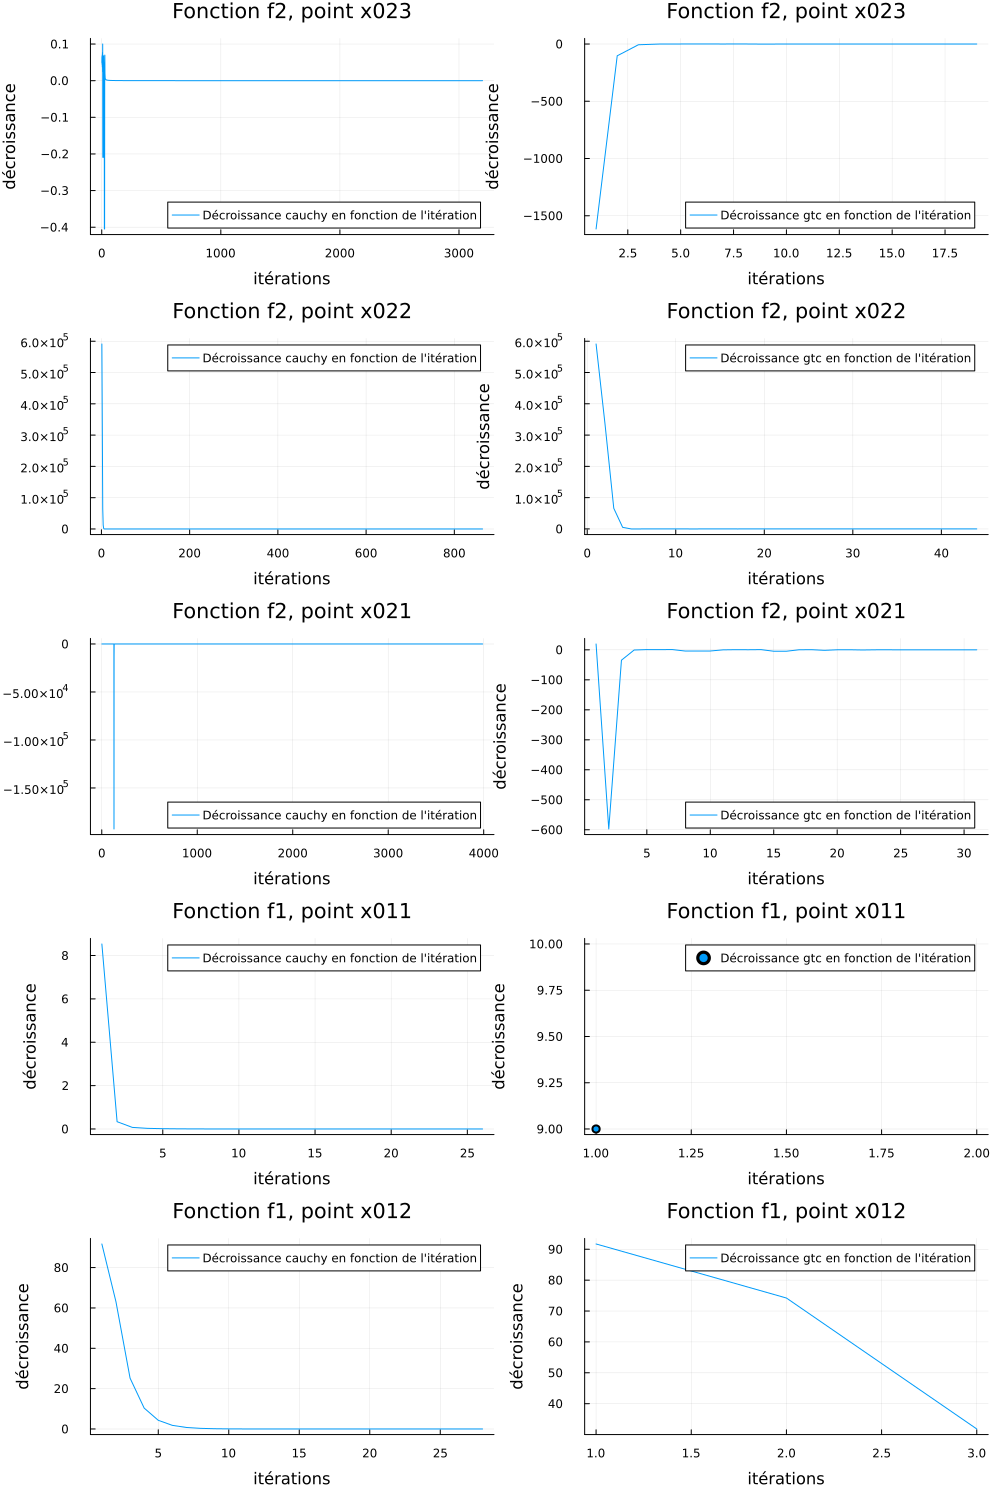

In [13]:
using Plots
include("../src/Regions_De_Confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")

# La tolérance utilisée dans les tests
tol_erreur = 1e-2
# initialisation des variables de l'algorithme
gamma1 = 0.5
gamma2 = 2.00
eta1 = 0.25
eta2 = 0.75
deltaMax = 10
Tol_abs = sqrt(eps())
Tol_rel = 1e-8
epsilon = 1
maxits = 5000
delta0_1 = 2
delta0_2 = 2
options =[deltaMax,gamma1,gamma2,eta1,eta2,delta0_1,maxits,Tol_abs,Tol_rel,epsilon]

_, _, _, nb_iters_cauchy, decroissances_cauchy  = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x023,options)
_, _, _, nb_iters_gct, decroissances_gct  = Regions_De_Confiance("gct",fct2,grad_fct2,hess_fct2,pts1.x023,options)

p1 = plot(1:nb_iters_cauchy, decroissances_cauchy, label="Décroissance cauchy en fonction de l'itération", xlabel="itérations", ylabel="décroissance", title="Fonction f2, point x023")
p2 = plot(1:nb_iters_gct, decroissances_gct, label="Décroissance gtc en fonction de l'itération", xlabel="itérations", ylabel="décroissance", title="Fonction f2, point x023")


_, _, _, nb_iters_cauchy, decroissances_cauchy  = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x022,options)
_, _, _, nb_iters_gct, decroissances_gct  = Regions_De_Confiance("gct",fct2,grad_fct2,hess_fct2,pts1.x022,options)

p3 = plot(1:nb_iters_cauchy, decroissances_cauchy, label="Décroissance cauchy en fonction de l'itération", xlabel="itérations", ylabel="décroissance", title="Fonction f2, point x022")
p4 = plot(1:nb_iters_gct, decroissances_gct, label="Décroissance gtc en fonction de l'itération", xlabel="itérations", ylabel="décroissance", title="Fonction f2, point x022")

_, _, _, nb_iters_cauchy, decroissances_cauchy  = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x021,options)
_, _, _, nb_iters_gct, decroissances_gct  = Regions_De_Confiance("gct",fct2,grad_fct2,hess_fct2,pts1.x021,options)

p5 = plot(1:nb_iters_cauchy, decroissances_cauchy, label="Décroissance cauchy en fonction de l'itération", xlabel="itérations", ylabel="décroissance", title="Fonction f2, point x021")
p6 = plot(1:nb_iters_gct, decroissances_gct, label="Décroissance gtc en fonction de l'itération", xlabel="itérations", ylabel="décroissance", title="Fonction f2, point x021")

_, _, _, nb_iters_cauchy, decroissances_cauchy  = Regions_De_Confiance("cauchy",fct1,grad_fct1,hess_fct1,pts1.x011,options)
_, _, _, nb_iters_gct, decroissances_gct  = Regions_De_Confiance("gct",fct1,grad_fct1,hess_fct1,pts1.x011,options)

p7 = plot(1:nb_iters_cauchy, decroissances_cauchy, label="Décroissance cauchy en fonction de l'itération", xlabel="itérations", ylabel="décroissance", title="Fonction f1, point x011")
p8 = scatter(1:nb_iters_gct, decroissances_gct, label="Décroissance gtc en fonction de l'itération", xlabel="itérations", ylabel="décroissance", title="Fonction f1, point x011")

_, _, _, nb_iters_cauchy, decroissances_cauchy  = Regions_De_Confiance("cauchy",fct1,grad_fct1,hess_fct1,pts1.x012,options)
_, _, _, nb_iters_gct, decroissances_gct  = Regions_De_Confiance("gct",fct1,grad_fct1,hess_fct1,pts1.x012,options)

p9 = plot(1:nb_iters_cauchy, decroissances_cauchy, label="Décroissance cauchy en fonction de l'itération", xlabel="itérations", ylabel="décroissance", title="Fonction f1, point x012")
p10 = plot(1:nb_iters_gct, decroissances_gct, label="Décroissance gtc en fonction de l'itération", xlabel="itérations", ylabel="décroissance", title="Fonction f1, point x012")

plot!(p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,layout=(5,2), size=(1000,1500), legend=:best)


## Réponse Q2

Quels sont les avantages et inconvénients des deux approches ?

L'approche avec le pas de Cauchy fourni des résultats précis et rapides sur des problèmes plutôt simples, mais de façon générale sa décroissance est lente.

Le gradient conjugué tronqué possède une décroissance plus rapide que le pas de Cauchy, attention tout de même à certains cas où il peut donner une décroissance négative et donc avoir une convergence plus lente que le pas de Cauchy.